In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Data

In [ ]:
'''
Main DataFrame
'''
df = pd.read_csv("/content/drive/MyDrive/others/apbd2021clean.csv")
df.head(1)

In [ ]:
'''
Copy of Original Dataset
'''
test = pd.read_csv("/content/drive/MyDrive/others/apbd2021clean.csv")
test.head(1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,15,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,apbdindex,kodesatker,namapemda,tahunanggaran,tglpengiriman,kodedata,statusdata,jeniscoa,nomorperda,...,namaakunkelompok,namaakunjenis,namaakunobjek,namaakunrincian,namaakunsub,nilaianggaran,standarfungsimapped,standarjenis,standarobjek,prov
0,0,15010,963311,kab. pidie jaya,2021,2021-01-29 16:43:16,0,4,3,7 tahun 2020,...,belanja operasi,belanja barang dan jasa,belanja barang,belanja barang pakai habis,belanja alat bahan untuk kegiatan kantor- baha...,4712400.0,1. pelayanan umum,522. belanja barang jasa,unmapped,1


In [ ]:
'''
Clean categorical data
'''
df = df.drop(columns = ["Unnamed: 0","kegiatanindex","md5"])
categorical_columns =  [col for col in df.columns if df[col].dtype == object ]
df[categorical_columns] = df[categorical_columns].apply(lambda col : col.str.lower().replace("|", ""))
df.to_csv("/content/drive/MyDrive/others/apbd2021clean.csv")

#EDA

In [ ]:
'''
DataFrame Information
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961851 entries, 0 to 3961850
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   apbdindex            int64  
 2   kodesatker           int64  
 3   namapemda            object 
 4   tahunanggaran        int64  
 5   tglpengiriman        object 
 6   kodedata             int64  
 7   statusdata           int64  
 8   jeniscoa             int64  
 9   nomorperda           object 
 10  tanggalperda         object 
 11  namaaplikasi         object 
 12  pengembangaplikasi   object 
 13  namaurusanprogram    object 
 14  namaurusanpelaksana  object 
 15  kodeskpd             object 
 16  namaskpd             object 
 17  namaprogram          object 
 18  namakegiatan         object 
 19  kodefungsi           object 
 20  namafungsi           object 
 21  namaakunutama        object 
 22  namaakunkelompok     object 
 23  namaakunjenis        object 
 24

In [ ]:
df[df.columns[:20]].head() #read columns

,Unnamed: 0,apbdindex,kodesatker,namapemda,tahunanggaran,kodedata,statusdata,jeniscoa,nomorperda,namaaplikasi,pengembangaplikasi,namaurusanprogram,namaurusanpelaksana,kodeskpd,namaskpd,namaprogram,namakegiatan,kodefungsi,namafungsi,namaakunutama
0,0,15010,963311,kab. pidie jaya,2021,0,4,3,7 tahun 2020,simak pijay,bpkk pijay,kecamatan,kecamatan,0600,kecamatan ulim,program penunjang urusan pemerintahan daerah k...,administrasi umum perangkat daerah|penyediaan ...,0101,pelayanan umum|lembaga eksekutif dan legislati...,belanja daerah
1,1,15010,963311,kab. pidie jaya,2021,0,4,3,7 tahun 2020,simak pijay,bpkk pijay,kecamatan,kecamatan,0500,kecamatan meurah dua,program penunjang urusan pemerintahan daerah k...,administrasi keuangan perangkat daerah|penyedi...,0101,pelayanan umum|lembaga eksekutif dan legislati...,belanja daerah
2,2,15010,963311,kab. pidie jaya,2021,0,4,3,7 tahun 2020,simak pijay,bpkk pijay,inspektorat daerah,inspektorat daerah,0100,inspektorat,program penunjang urusan pemerintahan daerah k...,administrasi keuangan perangkat daerah|penyedi...,0101,pelayanan umum|lembaga eksekutif dan legislati...,belanja daerah
3,3,15010,963311,kab. pidie jaya,2021,0,4,3,7 tahun 2020,simak pijay,bpkk pijay,urusan pemerintahan bidang pertanian,urusan pemerintahan bidang pertanian,0100,dinas pertanian dan pangan,program penyediaan dan pengembangan prasarana ...,pengembangan prasarana pertanian|pengelolaan l...,0403,ekonomi|pertanian kehutanan perikanan dan kela...,belanja daerah
4,4,15010,963311,kab. pidie jaya,2021,0,4,3,7 tahun 2020,simak pijay,bpkk pijay,urusan pemerintahan bidang kebudayaan,urusan pemerintahan bidang pendidikan,0100,dinas pendidikan,program pelestarian dan pengelolaan cagar budaya,pengelolaan cagar budaya peringkat kabupaten k...,1011,pendidikan|pengembangan budaya,belanja daerah


In [ ]:
df[df.columns[20:]].head() #read columns

,namaakunkelompok,namaakunjenis,namaakunobjek,namaakunrincian,namaakunsub,nilaianggaran,standarfungsimapped,standarjenis,standarobjek,prov
0,belanja operasi,belanja barang dan jasa,belanja barang,belanja barang pakai habis,belanja alat bahan untuk kegiatan kantor- baha...,4712400.0,1. pelayanan umum,522. belanja barang jasa,unmapped,1
1,belanja operasi,belanja barang dan jasa,belanja barang,belanja barang pakai habis,belanja makanan dan minuman jamuan tamu,5000000.0,1. pelayanan umum,522. belanja barang jasa,unmapped,1
2,belanja operasi,belanja pegawai,belanja gaji dan tunjangan asn,belanja tunjangan jabatan asn,belanja tunjangan jabatan pns,142710750.0,1. pelayanan umum,511. belanja pegawai tidak langsung,51101. gaji dan tunjangan,1
3,belanja operasi,belanja barang dan jasa,belana perjalanan dinas,belanja perjalanan dinas dalam negeri,belanja perjalanan dinas paket meeting dalam kota,16650000.0,4. ekonomi,522. belanja barang jasa,52215. belanja perjalanan dinas,1
4,belanja operasi,belanja barang dan jasa,belanja barang,belanja barang pakai habis,belanja alat bahan untuk kegiatan kantor- baha...,1000000.0,10. pendidikan,522. belanja barang jasa,unmapped,1


In [ ]:
'''
Check Nan Values across DataFrame
'''
df[categorical_columns].isna().sum()

namapemda              0
nomorperda             0
namaaplikasi           0
pengembangaplikasi     0
namaurusanprogram      0
namaurusanpelaksana    0
kodeskpd               0
namaskpd               0
namaprogram            0
namakegiatan           0
kodefungsi             0
namafungsi             0
namaakunutama          0
namaakunkelompok       0
namaakunjenis          0
namaakunobjek          0
namaakunrincian        0
namaakunsub            0
standarfungsimapped    0
standarjenis           0
standarobjek           0
dtype: int64

# Data Preprocessing


In [ ]:
'''
Feature Selection
'''
select_col = pd.read_csv("List Feature - APBD - output.csv", header = None)
select_col = select_col.values.flatten()
df = df[select_col].drop(columns = ["tglpengiriman", "tanggalperda", "Unnamed: 0"])

array(['apbdindex', 'kodesatker', 'namapemda', 'tahunanggaran',
       'tglpengiriman', 'kodedata', 'statusdata', 'jeniscoa',
       'nomorperda', 'tanggalperda', 'namaaplikasi', 'pengembangaplikasi',
       'kegiatanindex', 'namaurusanprogram', 'namaurusanpelaksana',
       'kodeskpd', 'namaskpd', 'namaprogram', 'namakegiatan',
       'kodefungsi', 'namafungsi', 'namaakunutama', 'namaakunkelompok',
       'namaakunjenis', 'namaakunobjek', 'namaakunrincian', 'namaakunsub',
       'nilaianggaran', 'standarfungsimapped', 'standarjenis',
       'standarobjek', 'md5', 'prov'], dtype=object)

In [ ]:
'''
Label Encoder
'''
categorical_columns =  [col for col in df.columns if df[col].dtype == object ]
le = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(lambda col : col.astype(str))
df[categorical_columns] = df[categorical_columns].apply(le.fit_transform)
df[categorical_columns]

,namapemda,nomorperda,namaaplikasi,pengembangaplikasi,namaurusanprogram,namaurusanpelaksana,kodeskpd,namaskpd,namaprogram,namakegiatan,...,namafungsi,namaakunutama,namaakunkelompok,namaakunjenis,namaakunobjek,namaakunrincian,namaakunsub,standarfungsimapped,standarjenis,standarobjek
0,278,61,22,9,65,124,292,8918,683,534,...,428,1,2,3,132,322,829,0,22,145
1,278,61,22,9,65,124,281,6612,683,349,...,428,1,2,3,132,322,2829,0,22,145
2,278,61,22,9,61,120,132,3294,683,353,...,428,1,2,20,154,1959,5794,0,12,69
3,278,61,22,9,336,423,132,2512,689,18044,...,125,1,2,3,39,1737,5152,4,22,105
4,278,61,22,9,276,405,132,1887,425,13682,...,548,1,2,3,132,322,829,1,22,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961846,64,51,25,10,386,471,132,1125,443,5010,...,197,1,2,3,190,1825,5401,7,22,97
3961847,64,51,25,10,368,453,207,2795,683,353,...,428,1,2,20,154,1987,5817,0,12,69
3961848,64,51,25,10,365,511,3202,1376,770,4283,...,115,1,2,3,190,616,2764,4,22,94
3961849,64,51,25,10,363,448,132,1036,683,353,...,428,1,2,20,154,1959,5794,0,12,69


In [ ]:
'''
Check Uniques for every encoded column
'''
df.apply(lambda col : len(col.unique()))

Unnamed: 0             3961851
apbdindex                  507
kodesatker                 506
namapemda                  507
tahunanggaran                1
kodedata                     1
statusdata                   4
jeniscoa                     1
nomorperda                  88
namaaplikasi                48
pengembangaplikasi          57
namaurusanprogram          481
namaurusanpelaksana        556
kodeskpd                  4667
namaskpd                 11986
namaprogram                788
namakegiatan             26154
kodefungsi                 387
namafungsi                 807
namaakunutama                7
namaakunkelompok            22
namaakunjenis               70
namaakunobjek              724
namaakunrincian           3018
namaakunsub               8005
nilaianggaran           858007
standarfungsimapped         10
standarjenis                37
standarobjek               146
prov                        30
dtype: int64

In [ ]:
'''
Check Candidate Column's Unique Proportion on the data
'''
df["namakegiatan"].value_counts() / len(df) * 100

333      5.228610
22020    1.857151
564      1.499372
461      1.192439
551      1.175754
           ...   
2004     0.000024
26440    0.000024
189      0.000024
15471    0.000024
9374     0.000024
Name: namakegiatan, Length: 27373, dtype: float64

In [ ]:
'''
Check Candidate Column's Unique Proportion on the data
'''
df["namaprogram"].value_counts() / len(df) * 100

971    11.427904
972     9.822163
438     9.627978
439     5.056480
441     4.350031
         ...    
293     0.000024
631     0.000024
764     0.000024
45      0.000024
63      0.000024
Name: namaprogram, Length: 1049, dtype: float64

In [ ]:
'''
Check Candidate Column's Unique Proportion on the data
'''
df["namafungsi"].value_counts() / len(df) * 100

754    13.762415
755    12.836321
670     9.461290
758     4.130865
286     3.314330
         ...    
959     0.000048
471     0.000024
974     0.000024
573     0.000024
533     0.000024
Name: namafungsi, Length: 1042, dtype: float64

In [ ]:
df.to_csv("finalapbd2021_encoded.csv")

# Nama Akun Jenis Model

In [ ]:
'''
Take Top 3 Category from Nama Akun Jenis
'''
top3_naj = df["namaakunjenis"].value_counts().head().index
naj = df[df["namaakunjenis"].isin(top3_naj)]
naj.head(3)

,apbdindex,kodesatker,namapemda,tahunanggaran,kodedata,statusdata,jeniscoa,nomorperda,namaaplikasi,pengembangaplikasi,...,namaakunkelompok,namaakunjenis,namaakunobjek,namaakunrincian,namaakunsub,nilaianggaran,standarfungsimapped,standarjenis,standarobjek,prov
0,15010,963311,278,2021,0,4,3,61,22,9,...,2,3,132,322,829,4712400.0,0,22,145,1
1,15010,963311,278,2021,0,4,3,61,22,9,...,2,3,132,322,2829,5000000.0,0,22,145,1
2,15010,963311,278,2021,0,4,3,61,22,9,...,2,20,154,1959,5794,142710750.0,0,12,69,1


In [ ]:
'''
Set Directory
'''
import os
os.chdir("/content/drive/MyDrive/others/Model ")

In [ ]:
'''
Create Isolation Model for each top 3 index in namaakunjenis
'''
for i, index in enumerate(top3_naj) :
  temp = naj[naj["namaakunjenis"] == index]
  model= IsolationForest(n_estimators=100,max_samples='auto',contamination = float(0.01),random_state=42)
  model.fit(temp)
  '''
  Save Model
  '''
  model_name = f"nama_akun_jenis_{i}_{index}.sav"
  joblib.dump(model, model_name )
  del temp

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have v

#Anomaly Analysis

## Nama Akun Jenis

In [ ]:
test["namaakunjenis"].value_counts()

belanja barang dan jasa                                                        3235960
belanja pegawai                                                                 397870
belanja modal peralatan dan mesin                                               183315
belanja modal gedung dan bangunan                                                24882
pendapatan transfer pemerintah pusat                                             17630
                                                                                ...   
sisa   lebih   perhitungan   anggaran   tahun\n\t\t\t\t\t\t\t\t\tsebelumnya          1
lain-lain pendapatan sesuai dengan ketentuan peraturan perundang- undangan           1
lain lain pendapatan sesuai dengan ketentuan peraturan perundang undangan            1
lain-lain pendapatan sesuai dengan ketentuan\nperaturan perundang-undangan           1
lain-lain pendapatan sesuai dengan ketentuan perat                                   1
Name: namaakunjenis, Length: 69, dtype: int

In [ ]:
df["namaakunjenis"].value_counts()

3     3235960
20     397870
17     183315
11      24882
54      17630
       ...   
33          1
37          1
65          1
35          1
38          1
Name: namaakunjenis, Length: 70, dtype: int64

In [ ]:
'''
Set Directory
'''
import os
os.chdir("/content/drive/MyDrive/others/analisis /nama akun jenis")

In [ ]:
'''
Belanja Barang dan Jasa
'''
naj_0 = naj[naj["namaakunjenis"] == 3]
model  = joblib.load("/content/drive/MyDrive/others/Model /nama_akun_jenis_0_3.sav")
naj_0["group"] = model.predict(naj_0)
naj_0.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,apbdindex,kodesatker,namapemda,tahunanggaran,kodedata,statusdata,jeniscoa,nomorperda,namaaplikasi,pengembangaplikasi,...,namaakunjenis,namaakunobjek,namaakunrincian,namaakunsub,nilaianggaran,standarfungsimapped,standarjenis,standarobjek,prov,group
0,15010,963311,278,2021,0,4,3,61,22,9,...,3,132,322,829,4712400.0,0,22,145,1,1
1,15010,963311,278,2021,0,4,3,61,22,9,...,3,132,322,2829,5000000.0,0,22,145,1,1
3,15010,963311,278,2021,0,4,3,61,22,9,...,3,39,1737,5152,16650000.0,4,22,105,1,1
4,15010,963311,278,2021,0,4,3,61,22,9,...,3,132,322,829,1000000.0,1,22,145,1,1
5,15010,963311,278,2021,0,4,3,61,22,9,...,3,132,322,1072,640000000.0,0,22,145,1,1


In [ ]:
naj_0.to_csv("group_0_belanja barang dan jasa.csv")

In [ ]:
'''
Belanja Pegawai
'''
naj_1 = naj[naj["namaakunjenis"] == 20]
model  = joblib.load("/content/drive/MyDrive/others/Model /nama_akun_jenis_1_20.sav")
naj_1["group"] = model.predict(naj_1)
naj_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,apbdindex,kodesatker,namapemda,tahunanggaran,kodedata,statusdata,jeniscoa,nomorperda,namaaplikasi,pengembangaplikasi,...,namaakunjenis,namaakunobjek,namaakunrincian,namaakunsub,nilaianggaran,standarfungsimapped,standarjenis,standarobjek,prov,group
2,15010,963311,278,2021,0,4,3,61,22,9,...,20,154,1959,5794,142710750.0,0,12,69,1,1
18,15174,980007,10,2021,0,4,3,1,23,34,...,20,154,564,2398,10172624.0,2,12,69,1,1
32,15397,963327,461,2021,0,4,3,4,25,10,...,20,154,1402,3896,9174.0,1,12,69,1,1
44,15174,980007,10,2021,0,4,3,1,23,34,...,20,154,1965,5801,47549040.0,0,12,69,1,1
46,15174,980007,10,2021,0,4,3,1,23,34,...,20,154,1946,5780,95304720.0,8,12,69,1,1


In [ ]:
naj_1.to_csv("group_1_20_belanja pegawai.csv")

In [ ]:
'''
Belanja Modal Peralatan dan Mesin
'''
naj_2 = naj[naj["namaakunjenis"] == 17]
model  = joblib.load("/content/drive/MyDrive/others/Model /nama_akun_jenis_2_17.sav")
naj_2["group"] = model.predict(naj_2)
naj_2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,apbdindex,kodesatker,namapemda,tahunanggaran,kodedata,statusdata,jeniscoa,nomorperda,namaaplikasi,pengembangaplikasi,...,namaakunjenis,namaakunobjek,namaakunrincian,namaakunsub,nilaianggaran,standarfungsimapped,standarjenis,standarobjek,prov,group
12,15010,963311,278,2021,0,4,3,61,22,9,...,17,219,933,3135,6.890000e+07,0,23,115,1,1
43,15174,980007,10,2021,0,4,3,1,23,34,...,17,306,1238,3627,6.380000e+06,0,23,116,1,1
50,15174,980007,10,2021,0,4,3,1,23,34,...,17,215,800,3378,2.700000e+09,3,23,145,1,1
86,15530,980053,61,2021,0,4,3,55,7,21,...,17,59,1206,3536,2.695000e+06,0,23,115,1,1
95,15591,987532,52,2021,0,4,3,3,25,10,...,17,219,1205,3562,1.965200e+07,0,23,115,1,1


In [ ]:
naj_2.to_csv("group_2_17_belanja modal peralatan dan mesin.csv")

## Nama Akun Jenis : Belanja Barang dan Jasa

In [ ]:
df_0 = pd.read_csv('/content/drive/MyDrive/others/analisis /nama akun jenis/group_0_3_belanja barang dan jasa.csv')
df_0 = df_0[df_0["nilaianggaran"] >= 0].drop(columns = ["Unnamed: 0", "tahunanggaran"])
df_0.head()

,apbdindex,kodesatker,namapemda,kodedata,statusdata,jeniscoa,nomorperda,namaaplikasi,pengembangaplikasi,namaurusanprogram,...,namaakunjenis,namaakunobjek,namaakunrincian,namaakunsub,nilaianggaran,standarfungsimapped,standarjenis,standarobjek,prov,group
0,15010,963311,278,0,4,3,61,22,9,65,...,3,132,322,829,4712400.0,0,22,145,1,1
1,15010,963311,278,0,4,3,61,22,9,65,...,3,132,322,2829,5000000.0,0,22,145,1,1
2,15010,963311,278,0,4,3,61,22,9,336,...,3,39,1737,5152,16650000.0,4,22,105,1,1
3,15010,963311,278,0,4,3,61,22,9,276,...,3,132,322,829,1000000.0,1,22,145,1,1
4,15010,963311,278,0,4,3,61,22,9,93,...,3,132,322,1072,640000000.0,0,22,145,1,1


In [ ]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235960 entries, 0 to 3235959
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   apbdindex            int64  
 2   kodesatker           int64  
 3   namapemda            int64  
 4   tahunanggaran        int64  
 5   kodedata             int64  
 6   statusdata           int64  
 7   jeniscoa             int64  
 8   nomorperda           int64  
 9   namaaplikasi         int64  
 10  pengembangaplikasi   int64  
 11  namaurusanprogram    int64  
 12  namaurusanpelaksana  int64  
 13  kodeskpd             int64  
 14  namaskpd             int64  
 15  namaprogram          int64  
 16  namakegiatan         int64  
 17  kodefungsi           int64  
 18  namafungsi           int64  
 19  namaakunutama        int64  
 20  namaakunkelompok     int64  
 21  namaakunjenis        int64  
 22  namaakunobjek        int64  
 23  namaakunrincian      int64  
 24

In [ ]:
'''
Anomaly - Not Anomaly Propotion
'''
df_0["group"].value_counts() / len(df_0) * 100

 1    99.004715
-1     0.995285
Name: group, dtype: float64

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/others/analisis /nama akun jenis/group_0_3_belanja barang dan jasa.csv')
test

,Unnamed: 0,apbdindex,kodesatker,namapemda,tahunanggaran,kodedata,statusdata,jeniscoa,nomorperda,namaaplikasi,...,namaakunjenis,namaakunobjek,namaakunrincian,namaakunsub,nilaianggaran,standarfungsimapped,standarjenis,standarobjek,prov,group
0,0,15010,963311,278,2021,0,4,3,61,22,...,3,132,322,829,4712400.0,0,22,145,1,1
1,1,15010,963311,278,2021,0,4,3,61,22,...,3,132,322,2829,5000000.0,0,22,145,1,1
2,3,15010,963311,278,2021,0,4,3,61,22,...,3,39,1737,5152,16650000.0,4,22,105,1,1
3,4,15010,963311,278,2021,0,4,3,61,22,...,3,132,322,829,1000000.0,1,22,145,1,1
4,5,15010,963311,278,2021,0,4,3,61,22,...,3,132,322,1072,640000000.0,0,22,145,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235955,3961843,15565,980302,64,2021,0,4,3,51,25,...,3,132,322,834,2753300.0,2,22,145,30,1
3235956,3961844,15565,980302,64,2021,0,4,3,51,25,...,3,39,1737,5148,8100000.0,3,22,105,30,1
3235957,3961846,15565,980302,64,2021,0,4,3,51,25,...,3,190,1825,5401,5000000.0,7,22,97,30,1
3235958,3961848,15565,980302,64,2021,0,4,3,51,25,...,3,190,616,2764,18320503.0,4,22,94,30,1


In [ ]:
anom = test[test.group == -1] #sampling anomaly
anom[anom.nilaianggaran == anom.nilaianggaran.max()]

,Unnamed: 0,apbdindex,kodesatker,namapemda,tahunanggaran,kodedata,statusdata,jeniscoa,nomorperda,namaaplikasi,...,namaakunjenis,namaakunobjek,namaakunrincian,namaakunsub,nilaianggaran,standarfungsimapped,standarjenis,standarobjek,prov,group
935624,1133404,15467,990828,483,2021,0,4,3,50,40,...,3,190,553,2413,1.519063e+12,7,22,95,9,-1


In [ ]:
test[test.group == 1] #sampling not anomaly

,Unnamed: 0,apbdindex,kodesatker,namapemda,tahunanggaran,kodedata,statusdata,jeniscoa,nomorperda,namaaplikasi,...,namaakunjenis,namaakunobjek,namaakunrincian,namaakunsub,nilaianggaran,standarfungsimapped,standarjenis,standarobjek,prov,group
0,0,15010,963311,278,2021,0,4,3,61,22,...,3,132,322,829,4712400.0,0,22,145,1,1
1,1,15010,963311,278,2021,0,4,3,61,22,...,3,132,322,2829,5000000.0,0,22,145,1,1
2,3,15010,963311,278,2021,0,4,3,61,22,...,3,39,1737,5152,16650000.0,4,22,105,1,1
3,4,15010,963311,278,2021,0,4,3,61,22,...,3,132,322,829,1000000.0,1,22,145,1,1
4,5,15010,963311,278,2021,0,4,3,61,22,...,3,132,322,1072,640000000.0,0,22,145,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235955,3961843,15565,980302,64,2021,0,4,3,51,25,...,3,132,322,834,2753300.0,2,22,145,30,1
3235956,3961844,15565,980302,64,2021,0,4,3,51,25,...,3,39,1737,5148,8100000.0,3,22,105,30,1
3235957,3961846,15565,980302,64,2021,0,4,3,51,25,...,3,190,1825,5401,5000000.0,7,22,97,30,1
3235958,3961848,15565,980302,64,2021,0,4,3,51,25,...,3,190,616,2764,18320503.0,4,22,94,30,1


In [ ]:
'''
Anomaly vs Not Anomaly
'''
df_0_not = df_0[df_0["group"] == 1]
df_0_anom = df_0[df_0["group"] == -1]

In [ ]:
'''
Nilai Anggaran Column
'''
df_0_na = pd.concat((df_0_not["nilaianggaran"].describe().round(), df_0_anom["nilaianggaran"].describe()), axis = 1)
df_0_na.columns = ["not_anomaly", "anomaly"]
df_0_na

,not_anomaly,anomaly
count,3.203752e+06,3.220700e+04
mean,7.834631e+07,1.812444e+09
std,1.805722e+09,1.602923e+10
min,0.000000e+00,0.000000e+00
25%,1.400000e+06,1.400000e+06
50%,5.900000e+06,2.263000e+07
75%,2.387700e+07,2.929000e+08
max,1.187178e+12,1.519063e+12


# Feature Importances

Feature: apbdindex, Score: 0.03018350981268087
Feature: kodesatker, Score: 0.030787677020453742
Feature: namapemda, Score: 0.024437321135237552
Feature: kodedata, Score: 0.0
Feature: statusdata, Score: 0.05420294488880043
Feature: jeniscoa, Score: 0.0
Feature: nomorperda, Score: 0.023144812057837486
Feature: namaaplikasi, Score: 0.04119395438132742
Feature: pengembangaplikasi, Score: 0.030617570346495218
Feature: namaurusanprogram, Score: 0.04087103946021425
Feature: namaurusanpelaksana, Score: 0.04331846051079377
Feature: kodeskpd, Score: 0.04134424269753837
Feature: namaskpd, Score: 0.07787692174216702
Feature: namaprogram, Score: 0.04004680522417444
Feature: namakegiatan, Score: 0.04447130627490144
Feature: kodefungsi, Score: 0.02046038035826127
Feature: namafungsi, Score: 0.03861863663466175
Feature: namaakunutama, Score: 0.013776788426833194
Feature: namaakunkelompok, Score: 0.0
Feature: namaakunjenis, Score: 0.0
Feature: namaakunobjek, Score: 0.07058682644913822
Feature: namaakun

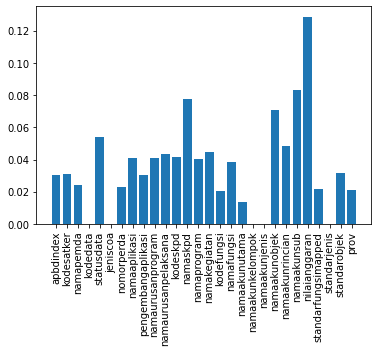

In [ ]:
'''
Random Forest [Classifier] Feature Importances
'''
X = df_0.drop(columns = "group")
y = df_0["group"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state=42)
rf = RandomForestClassifier()
# fit the model
rf.fit(X_train, y_train)
# get importance
importance = rf.feature_importances_

'''
Plot Feature Importances
'''
for i,v in enumerate(importance):
	print(f'Feature: {X.columns[i]}, Score: {v}')

plt.bar([X.columns[x] for x in range(len(importance))], importance)
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

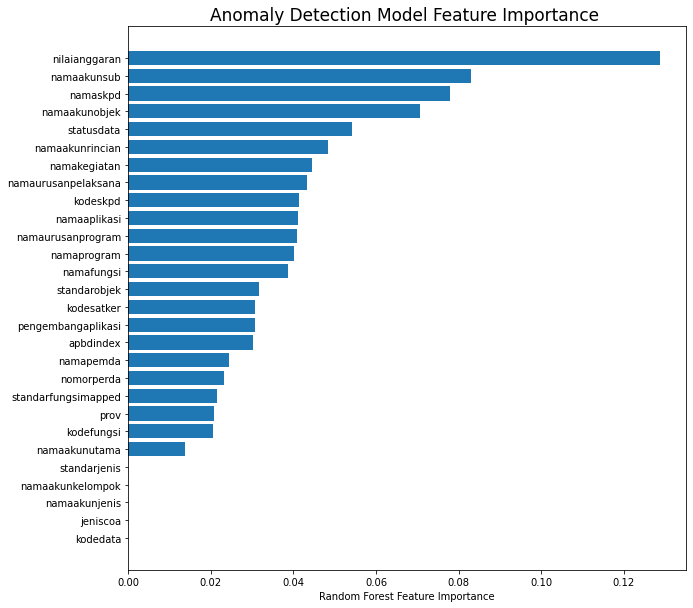

In [ ]:
'''
Plot Model Feature Importance 2
'''
sorted_idx = importance.argsort()
plt.figure(figsize=(10,10))
plt.barh(X_train.columns[sorted_idx], importance[sorted_idx])
plt.title("Anomaly Detection Model Feature Importance ",fontsize = 17)
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [ ]:
'''
Model Evaluation
'''
y_pred = rf.predict(X_test)
print("Model Evaluation")
print(classification_report(y_test, y_pred))

Model Evaluation
              precision    recall  f1-score   support

          -1       0.98      0.90      0.94     10628
           1       1.00      1.00      1.00   1057239

    accuracy                           1.00   1067867
   macro avg       0.99      0.95      0.97   1067867
weighted avg       1.00      1.00      1.00   1067867



In [ ]:
'''
Save Model
'''
joblib.dump(rf, "classification_model.sav" )

['classification_model.sav']